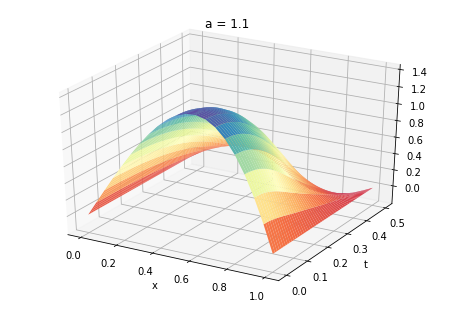

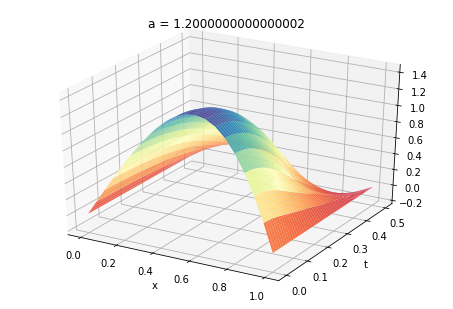

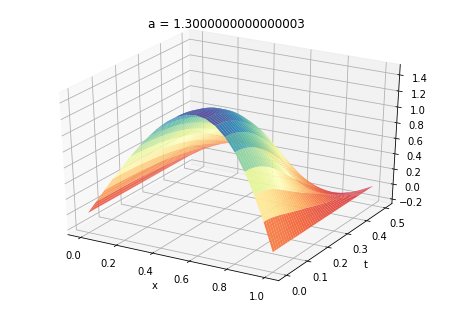

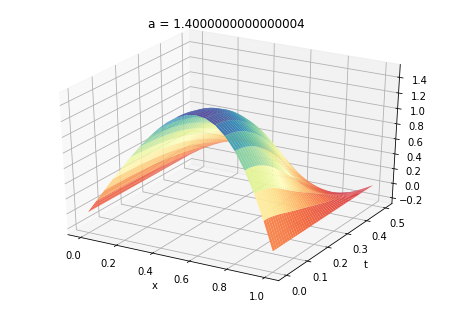

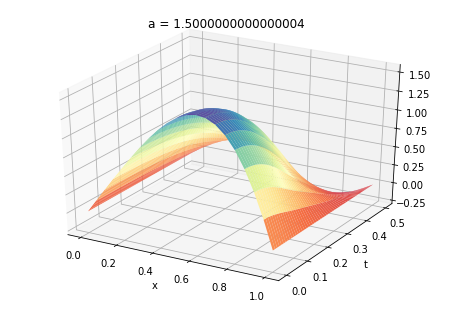

In [3]:
#Эйлер с пересчетом
import math as m # подключаем библиотеки...
import numpy as np
import pylab
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
#инициализация
x_min = 0.
x_max = 1.
t_min = 0.
t_max = .5
t = 0.001
h = 0.05
N = int((x_max-x_min)/h)+1
T = int((t_max-t_min)/t)
A = np.zeros((N,N))# матрица перехода по пространству
for i in range(1,N-1):
    A[i][i]=-2
    A[i][i-1]=1
    A[i][i+1]=1
A=A/h**2

a=np.arange(1.1,1.6,0.1)
u = np.zeros((T,N))
nevyazka = np.zeros((T,N))
g = np.arange(0,N,1)
for j in range(0,len(a)):
    u[0] = u[1] = (a[j]*(h*g)**2+1.1)*np.sin(h*g*m.pi)#условие равенства нулю производной по времени в нуле
    for i in range(1,T-1):
        u[i+1]=u[i]*2-u[i-1]+A.dot(u[i])*t*t
        c = np.arange(0,N,1)
        for k in range(0,N):
            if (g[k]*h+t*i)<=1:
                c[k]=(g[k]*h+t*i)
            else:
                c[k]=2-(g[k]*h+t*i)
        f=(g*h-t*i)
        d=(a[j]*c**2+1.1)*np.sin(m.pi*c)+(a[j]*f**2+1.1)*np.sin(m.pi*f)
        nevyazka[i+1]=u[i+1]-d/2
    #строим графики
    def makeData ():
        X = np.arange (x_min, x_max+h, h)
        Time = np.arange (t_min, t_max, t)
        xgrid, tgrid = np.meshgrid(X, Time)
        #teorgrid = -np.sin(m.pi*xgrid) * m.expm1(-tgrid*m.pi**2)
        return xgrid, tgrid#, teorgrid

    x, y = makeData()
    fig = pylab.figure()
    axes = Axes3D(fig)

    axes.plot_surface(x, y, u, cmap = cm.Spectral)
    pylab.title(f"a = {a[j]}")
    pylab.xlabel('x')
    pylab.ylabel('t')
    pylab.show()
    